In 2012, [Nandra et al. 2012](https://ui.adsabs.harvard.edu/abs/2012MNRAS.422.2945N/abstract) published research on the effect of an accelerating universe on a massive object. We start here.

Later that year, [Berhoozi et al. 2012](https://ui.adsabs.harvard.edu/abs/2013JCAP...06..019B/abstract) presented an expression for the radial and tangential escape speed from a cluster in this same context. Specifically, they provide the expression for a point source. Berhoozi introduced the term "equivalence radius" to define the point in space (relative to the center of a cluster) where the inward force of gravity (by the enclosed mass) balances the outward force created by the accelerated expansion of space-time:

$$r_{eq} = \sqrt[3]{\frac{GM}{-qH^2}} $$

where $H$ defines the expansion rate of the universe's scale factor: $\frac{\dot{a}}{a}$ and $q$ is the decelaration parameter, $q = -\frac{\ddot{a}{a}}{\dot{a}^2 } $. Note that the term $qH^2$ is then:

$$qH^2 = \frac{\ddot{a}}{a} = -\frac{4\pi G}{3} \sum_i \rho_i(1+3w_i)$$

where $w_i = p_i/(\rho_ic^2)$ and $p_i$, $\rho_i$ define the pressure and densities of the mass-energy components in the Friedmann equation. $w_i$ are the equations of state (0 for non-relativistic matter, 1/3 for radiation, and −1 for dark energy).

In 2016, our team began to take this theory into the obervational world. In [Miller et al. 2016](https://iopscience.iop.org/article/10.3847/0004-637X/822/1/41) we established escape velocity in the context of typical Poisson pairs. The Poisson equation relates the density to the potential via: 

$$\nabla^2{\Psi(r)} = 4\pi G \rho(r)$$,

where $\Psi$ defines the total effective potential which includes both the gravitational component as well as the pther piece from the acceleration of space-time. In the weak field (i.e. Newtonian) limit, $v^2_{escape}(r) = -2\Psi(r)$:

$$v_{esc} = \sqrt{(-2\Phi(r) + 2\Phi(r_{eq}) - qH^2(r^2 - r_{eq}^2)}$$
where $\Phi$ is the gravitational-only part of the potential. The other terms incorporate the effect of an accelerating space-time through $qH^2$.

It is $v_{escape}$ which can be measured using data or simulations in order to infer the total potential $\Psi$. A key result from Miller et al. 2016 is that the escape velocity at $r_{eq}$ is zero by definition. This established the baseline of the observable escape velocity (in 3D) using the Millennium simulation data. The accuracy and precision of the observable to the theory is percent level.


Later that year, [Stark et al. 2016](https://iopscience.iop.org/article/10.3847/0004-637X/830/2/109) established this technique as a true cosmological probe and the first results were reported on real data which direct comparisons (i.e., blind equivalent tests) to simulations.

In 2017, [Stark et al. 2017](https://ui.adsabs.harvard.edu/abs/2017PhRvD..96b3543S/abstract) built a Fisher Matrix formulism to make predictions on how well the escape velocity technique could constrain cosmological parameters.

In [1]:
import numpy as np
import path as Path
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.cosmology import FlatwCDM
from astropy.cosmology import FlatLambdaCDM
from astropy.cosmology import LambdaCDM
from astropy.cosmology import wCDM
from astropy.cosmology import Flatw0waCDM
import scipy
from escape_functions_noastropy import *
from multiprocessing import Process
from multiprocessing import Queue
from multiprocessing import Pool
import emcee
import corner
from scipy.interpolate import interp1d

In [3]:
cosmo = FlatwCDM(H0=70, Om0=0.2,w0=-1)
cosmo = wCDM(H0=70, Om0=0.2,Ode0 = 0.8,w0=-1)
cosmo = FlatLambdaCDM(H0=70,Om0=0.2)
cosmo = LambdaCDM(H0=70, Om0=0.2, Ode0 = 0)
cosmo = Flatw0waCDM(H0=70, Om0=0.2, w0=-0.9, wa=0.2)

In [2]:
def cosmology(cosmology):
    case = cosmology.name
    if case == 'Flatw0waCDM':
        return [cosmology.Om0, cosmology.w0, cosmology.wa, cosmology.h]
    
    elif case == 'FlatwCDM':
        return [cosmology.Om0, cosmology.w0, cosmology.h]

    elif case == 'wCDM':
        return [cosmology.Om0, cosmology.Ode0, cosmology.w0,cosmology.h]
        
    elif case == 'LambdaCDM':
        return [cosmology.Om0, cosmology.Ode0, cosmology.h]

    elif case == 'FlatLambdaCDM':
        return [cosmology.Om0, cosmology.h]

In [14]:
cosmo = FlatLambdaCDM(H0=70,Om0=0.2,name='FlatLambdaCDM')
cosmo_params = cosmology(cosmo)
z=0.2
M200 = 1e15*u.solMass
rho_crit = cosmo.critical_density(z)
rho_crit = rho_crit.to(u.solMass / u.Mpc**3)
print 'Astropys critical density: ', rho_crit
print 'Internal critical density: ',rho_crit_z(z,cosmo_params,'FlatLambdaCDM')
R200crit =  (3*M200/(4*np.pi*200.* rho_crit))**(1./3.)
radius_array = np.linspace(0.3,2.0,100).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
theta_array = radius_array /cosmo.angular_diameter_distance(z)
R200crit =  (3*M200/(4*np.pi*200.* rho_crit))**(1./3.)
print 'Spherical R200 for a given M200: ', R200crit
G_newton = astroc.G.to( u.Mpc *  u.km**2 / u.s**2 / u.solMass).value #Mpc km2/s^2 kg
print 'Gravity (Mpc km2/s^2 kg), mass, cosmology: ', G_newton, M200, cosmo_params, cosmo.name
print 'q = ', q_z_function(z, cosmo_params,cosmo.name)
print 'r_eq = ', r_eq(0.2,M200,cosmo_params, cosmo.name)

Astropys critical density:  1.55793520483e+11 solMass / Mpc3
Internal critical density:  1.55793520483e+11 solMass / Mpc3
Spherical R200 for a given M200:  1.97141172229 Mpc
Gravity (Mpc km2/s^2 kg), mass, cosmology:  4.30091727007e-09 1e+15 solMass [0.2, 0.7] FlatLambdaCDM
q =  -0.547486033519553
r_eq =  11.1854377804 Mpc


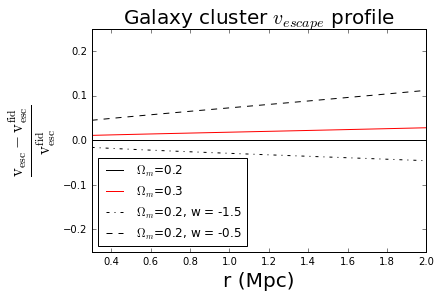

At z =  0.2


In [10]:
cosmo = FlatLambdaCDM(H0=70,Om0=0.2,name = 'FlatLambdaCDM')
cosmo_params = cosmology(cosmo)
radius_array = np.linspace(0.3,2.0,100).round(3) *u.Mpc #specify radius array for profiles. used in v_esc(r) funcs below.
z = 0.2
theta_array = radius_array /D_A(z,cosmo_params, cosmo.name)
r,phi0 = v_esc_einasto(theta_array,z,rho_0,h,n,100,cosmo_params, cosmo.name)
plt.plot(radius_array,(phi0-phi0)/phi0*1.0,'k',label=r'$\Omega_m$=0.2')
cosmo = FlatLambdaCDM(H0=70,Om0=0.3,name = 'FlatLambdaCDM')
cosmo_params = cosmology(cosmo)
r,phi = v_esc_einasto(theta_array,z,rho_0,h,n,100,cosmo_params, cosmo.name)
plt.plot(radius_array,(phi-phi0)/phi0*1.0,'r', label=r'$\Omega_m$=0.3')
cosmo = FlatwCDM(H0=70,Om0=0.2,w0=-1.5,name = 'FlatwCDM')
cosmo_params = cosmology(cosmo)
r,phi = v_esc_einasto(theta_array,z,rho_0,h,n,100,cosmo_params, cosmo.name)
plt.plot(radius_array,(phi-phi0)/phi0*1.0,'k-.',label=r'$\Omega_m$=0.2, w = -1.5')
cosmo = FlatwCDM(H0=70,Om0=0.2,w0=-0.5,name = 'FlatwCDM')
cosmo_params = cosmology(cosmo)
r,phi = v_esc_einasto(theta_array,z,rho_0,h,n,100,cosmo_params, cosmo.name)
plt.plot(radius_array,(phi-phi0)/phi0*1.0,'k--',label=r'$\Omega_m$=0.2, w = -0.5')
plt.legend(loc=0)
plt.xlim(0.3,2)
plt.ylim(-0.25,0.25)
plt.ylabel(r'$\frac{\rm{v}_{esc}-\rm{v}_{esc}^{fid}}{\rm{v}_{esc}^{fid}}$',fontsize=24)
plt.xlabel('r (Mpc)', fontsize=20)
plt.title(r'Galaxy cluster $v_{escape}$ profile',fontsize=20)
plt.show()
print 'At z = ', z

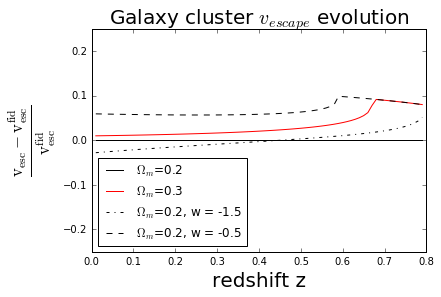

At r =  0.9010000000000001


In [11]:
cosmo = FlatLambdaCDM(H0=70,Om0=0.2,name = 'FlatLambdaCDM')
cosmo_params = cosmology(cosmo)
radius_array = np.linspace(0.3,2.0,100).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
z= np.arange(0.01, 0.8, 0.01)
rrr = 1.5
vesc_z0 = []
radius_use = 35
for i in range(len(z)):
    theta_array = radius_array /D_A(z[i],cosmo_params, cosmo.name).value
    r,vesc = v_esc_einasto(theta_array,z[i],rho_0,h,n,100,cosmo_params, cosmo.name)
    vesc_z0 = np.append(vesc_z0,vesc[radius_use])
plt.plot(z,(vesc_z0-vesc_z0)/vesc_z0*1.0,'k',label=r'$\Omega_m$=0.2')
cosmo = FlatLambdaCDM(H0=70,Om0=0.3,name = 'FlatLambdaCDM')
cosmo_params = cosmology(cosmo)
vesc_z = []
for i in range(len(z)):
    theta_array = radius_array /D_A(z[i],cosmo_params, cosmo.name).value
    r,vesc = v_esc_einasto(theta_array,z[i],rho_0,h,n,100,cosmo_params, cosmo.name)
    vesc_z = np.append(vesc_z,vesc[radius_use])
plt.plot(z,(vesc_z-vesc_z0)/vesc_z0*1.0,'r', label=r'$\Omega_m$=0.3')
vesc_z = []
cosmo = FlatwCDM(H0=70,Om0=0.2,w0=-1.5,name = 'FlatwCDM')
cosmo_params = cosmology(cosmo)
for i in range(len(z)):
    theta_array = radius_array /D_A(z[i],cosmo_params, cosmo.name).value
    r,vesc = v_esc_einasto(theta_array,z[i],rho_0,h,n,100,cosmo_params, cosmo.name)
    vesc_z = np.append(vesc_z,vesc[radius_use])
plt.plot(z,(vesc_z-vesc_z0)/vesc_z0*1.0,'k-.',label=r'$\Omega_m$=0.2, w = -1.5')
vesc_z = []
cosmo = FlatwCDM(H0=70,Om0=0.2,w0=-0.5,name = 'FlatwCDM')
cosmo_params = cosmology(cosmo)
for i in range(len(z)):
    theta_array = radius_array /D_A(z[i],cosmo_params, cosmo.name).value
    r,vesc = v_esc_einasto(theta_array,z[i],rho_0,h,n,100,cosmo_params, cosmo.name)
    vesc_z = np.append(vesc_z,vesc[radius_use])
plt.plot(z,(vesc_z-vesc_z0)/vesc_z0*1.0,'k--',label=r'$\Omega_m$=0.2, w = -0.5')
plt.legend(loc=0)
plt.xlim(0,0.8)
plt.ylim(-0.25,0.25)
plt.ylabel(r'$\frac{\rm{v}_{esc}-\rm{v}_{esc}^{fid}}{\rm{v}_{esc}^{fid}}$',fontsize=24)
plt.xlabel('redshift z', fontsize=20)
plt.title(r'Galaxy cluster $v_{escape}$ evolution',fontsize=20)
plt.show()
print 'At r = ',r[radius_use]

In [3]:
cosmo_name = 'FlatLambdaCDM'
cosmo = FlatLambdaCDM(H0=70, Om0=0.2,name = cosmo_name)
cosmo_params = cosmology(cosmo)
z = np.array((0.05))
z = np.repeat(z,(1))
num_clus = len(z)
M200_orig = np.repeat(5e14*u.solMass,len(z))
M200_use = np.repeat(5e14,len(z))
N = np.repeat(100,len(z))
radial_bins = 10
radius_array = np.linspace(0.1,2.0,radial_bins).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
xdata = np.zeros((len(z),radial_bins))
for i in range(len(z)):
    xdata[i] = radius_array /D_A(z[i], cosmo_params, cosmo.name).value

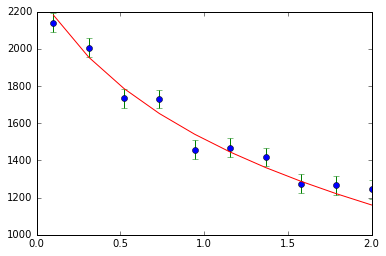

In [4]:
r,ydata = v_esc_NFW_M200(xdata,z,M200_use,N,cosmo_params, cosmo.name,num_clus)
error_kms = 50
ydata = ydata  + np.random.normal(0,error_kms,size=np.shape(ydata)) 
ydata_err = np.zeros(np.shape(ydata)) + error_kms

for i in range(len(z)):
    plt.plot(r[i],ydata[i],'o', label = 'Data '+ str(i))
    plt.errorbar(r[i],ydata[i],yerr=ydata_err[i], linestyle='None')
r,truth = v_esc_NFW_M200(xdata,z,M200_use,N,cosmo_params, cosmo.name,num_clus)
for i in range(len(z)):
    plt.plot(r[i],truth[i],'-', label = 'Truth '+ str(i))

In [5]:
def lnprior(theta):
    p_M200 = theta[0]
    if not(1e13 < p_M200 < 1e17 ):
          return -np.inf
    return 0.0

In [6]:
def lnlike(theta, x, y, yerr): 
    p_theta_array = x
    p_z = z
    p_M200 = theta[0]
    p_N = N
    p_num_clus = num_clus
    p_cosmo_params = cosmo_params
    p_cosmo_name = cosmo_name
    ymodel_fixed = lambda p_theta_array,p_M200:v_esc_NFW_M200(p_theta_array,p_z,p_M200,p_N,p_cosmo_params,p_cosmo_name,p_num_clus)
    r_cosmo, ymodel = ymodel_fixed(p_theta_array,p_M200)
    inv_sigma2 = 1.0/(yerr**2)
#    print -0.5*(np.sum((y-ymodel)**2*inv_sigma2))
    return np.nan_to_num(-0.5*(np.sum((y-ymodel)**2*inv_sigma2)))

In [7]:
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    ll = lnlike(theta, x, y, yerr)
    if not np.isfinite(lp):
        return -np.inf
    if not np.isfinite(ll):
        return -np.inf    
    return lp + lnlike(theta, x, y, yerr)

In [8]:
ndim, nwalkers, nsteps = 1, 50, 1000
p0 = np.transpose([np.random.uniform(1,10000,size=nwalkers)*1e13])#print np.shape(p0)

In [9]:
pool = Pool(processes=30)     
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(xdata, ydata, ydata_err),pool=pool)
sampler.run_mcmc(p0, nsteps)

escape_functions_noastropy.py:117: RuntimeWarning: invalid value encountered in double_scalars
  r200 =   (3*M200[i]/(4*np.pi*200*rho_crit))**(1/3.0)
escape_functions_noastropy.py:117: RuntimeWarning: invalid value encountered in double_scalars
  r200 =   (3*M200[i]/(4*np.pi*200*rho_crit))**(1/3.0)
escape_functions_noastropy.py:420: RuntimeWarning: invalid value encountered in double_scalars
  c200 = A * (mass/Mpivot)**B * (1+redshift)**C
escape_functions_noastropy.py:420: RuntimeWarning: invalid value encountered in double_scalars
  c200 = A * (mass/Mpivot)**B * (1+redshift)**C
/u/home/christoq/anaconda/lib/python2.7/site-packages/astropy/units/quantity.py:641: RuntimeWarning: invalid value encountered in power
  *arrays, **kwargs)
/u/home/christoq/anaconda/lib/python2.7/site-packages/astropy/units/quantity.py:641: RuntimeWarning: invalid value encountered in power
  *arrays, **kwargs)
escape_functions_noastropy.py:117: RuntimeWarning: invalid value encountered in double_scalars
  r20

State([[4.93975495e+14]
 [5.03398835e+14]
 [4.95501104e+14]
 [5.08845745e+14]
 [5.12151026e+14]
 [5.19423188e+14]
 [5.27846725e+14]
 [5.20419744e+14]
 [5.25680533e+14]
 [5.00832439e+14]
 [5.15499548e+14]
 [5.15625686e+14]
 [5.14582070e+14]
 [5.14918411e+14]
 [4.97449467e+14]
 [4.99552916e+14]
 [5.09083764e+14]
 [5.08870924e+14]
 [5.13760015e+14]
 [5.06947657e+14]
 [5.02626470e+14]
 [5.09359694e+14]
 [5.18368472e+14]
 [5.15595904e+14]
 [4.95177967e+14]
 [5.18534478e+14]
 [5.25646470e+14]
 [5.01279357e+14]
 [5.29609404e+14]
 [5.07835284e+14]
 [5.00506928e+14]
 [5.28355006e+14]
 [5.16916804e+14]
 [5.20156433e+14]
 [5.12879360e+14]
 [5.16467477e+14]
 [4.99986515e+14]
 [5.12907555e+14]
 [5.25698655e+14]
 [4.94387268e+14]
 [5.21649137e+14]
 [5.04372008e+14]
 [5.27098853e+14]
 [5.19931128e+14]
 [5.23558256e+14]
 [5.00309374e+14]
 [5.14037718e+14]
 [5.21549893e+14]
 [5.22041376e+14]
 [5.06305894e+14]], log_prob=[-7.12263726 -6.37211507 -6.95720729 -6.22869902 -6.24307846 -6.53912113
 -7.326174

(50, 1000, 1)


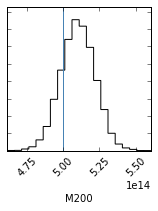

67
median(M200) =  510138995903867.5 +/- 11360384184424.75 11510608700227.312
median(logM200) =  14.707688523018646 +/- 0.00956527349386782 0.009911523510018228
Truth:  [14.69897]


In [10]:
burn = 100
samples = sampler.chain[:, burn:, :].reshape((-1, 1))
print np.shape(sampler.chain)
fig = corner.corner(samples[:,:], labels=["M200"], truths = [M200_use])
plt.show()
percentile_array = np.arange(33-16.5,67+16.5, 1.0)
print len(percentile_array)
M200_fit =  np.percentile(sampler.chain[:,burn:,0],percentile_array)
M200_fit_50 =  np.percentile(sampler.chain[:,burn:,0],50)
M200_fit_33 =  np.percentile(sampler.chain[:,burn:,0],33-16.5)
M200_fit_67 =  np.percentile(sampler.chain[:,burn:,0],67+16.5)
print 'median(M200) = ', M200_fit_50, '+/-', M200_fit_67-M200_fit_50, M200_fit_50-M200_fit_33
print 'median(logM200) = ', np.log10(M200_fit_50), '+/-', np.log10(M200_fit_67)-np.log10(M200_fit_50), np.log10(M200_fit_50) -np.log10(M200_fit_33)
sigma_M200_fit = (M200_fit_67-M200_fit_50 + M200_fit_50-M200_fit_33)/2.0
print 'Truth: ', np.log10(M200_use)

In [115]:
cosmo_name = 'FlatLambdaCDM'
cosmo = FlatLambdaCDM(H0=70, Om0=0.2,name = cosmo_name)
cosmo_params = cosmology(cosmo)
z = np.array((0.2))
z = np.repeat(z,(1))
num_clus = len(z)
M200_orig = np.repeat(5e14*u.solMass,len(z))
M200_use = np.repeat(5e14,len(z))
N = np.repeat(100,len(z))
radial_bins = 10
radius_array = np.linspace(0.1,2.0,radial_bins).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
xdata = np.zeros((len(z),radial_bins))
for i in range(len(z)):
    xdata[i] = radius_array /D_A(z[i], cosmo_params, cosmo.name).value

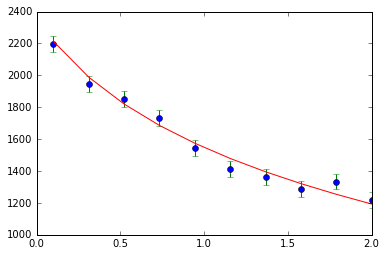

In [116]:
r,ydata = v_esc_NFW_M200(xdata,z,M200_use,N,cosmo_params, cosmo.name,num_clus)
error_kms = 50
ydata = ydata  + np.random.normal(0,error_kms,size=np.shape(ydata)) 
ydata_err = np.zeros(np.shape(ydata)) + error_kms

for i in range(len(z)):
    plt.plot(r[i],ydata[i],'o', label = 'Data '+ str(i))
    plt.errorbar(r[i],ydata[i],yerr=ydata_err[i], linestyle='None')
r,truth = v_esc_NFW_M200(xdata,z,M200_use,N,cosmo_params, cosmo.name,num_clus)
for i in range(len(z)):
    plt.plot(r[i],truth[i],'-', label = 'Truth '+ str(i))

In [117]:
def lnprior(theta):
    p_rho_s = theta[0]
    p_r_s = theta[1]
    if not((1e13 < p_rho_s < 1e17) & (0.2 < p_r_s < 1)):
          return -np.inf
    return 0.0

In [118]:
def lnlike(theta, x, y, yerr): 
    p_theta_array = x
    p_z = z
    p_rho_s= theta[0]
    p_r_s = theta[1]
    p_N = N
    p_num_clus = num_clus
    p_cosmo_params = cosmo_params
    p_cosmo_name = cosmo_name
    ymodel_fixed = lambda p_theta_array,p_rho_s, p_r_s:v_esc_NFWs(p_theta_array,p_z, p_rho_s, p_r_s,N,p_cosmo_params,p_cosmo_name,p_num_clus)
    r_cosmo, ymodel = ymodel_fixed(p_theta_array,p_rho_s, p_r_s)
#    print model
    inv_sigma2 = 1.0/(yerr**2)
#    print -0.5*(np.sum((y-ymodel)**2*inv_sigma2))
    return np.nan_to_num(-0.5*(np.sum((y-ymodel)**2*inv_sigma2)))

In [119]:
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    ll = lnlike(theta, x, y, yerr)
    if not np.isfinite(lp):
        return -np.inf
    if not np.isfinite(ll):
        return -np.inf    
    return lp + lnlike(theta, x, y, yerr)

In [120]:
ndim, nwalkers, nsteps = 2, 50, 1000
p0 = np.transpose([np.random.uniform(1,10000,size=nwalkers)*1e13, np.random.uniform(0.2,1,size=nwalkers)])

In [121]:
pool = Pool(processes=35)     
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(xdata, ydata, ydata_err),pool=pool)
sampler.run_mcmc(p0, nsteps)

escape_functions_noastropy.py:248: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  rho_r = np.append(rho_r,4*np.pi*integrate.quad(rhos_nfw_int,0,r[j],args=(rho_s[i],r_s[i]))[0]/(4/3.*np.pi*(r[j]**3.0)))
escape_functions_noastropy.py:248: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  rho_r = np.append(rho_r,4*np.pi*integrate.quad(rhos_nfw_int,0,r[j],args=(rho_s[i],r_s[i]))[0]/(4/3.*np.pi*(r[j]**3.0)))
escape_functions_noastropy.py:248: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  rho_r = np.append(rho_r,4*np.pi*integrate

State([[5.47170441e+14 4.76574942e-01]
 [2.63442212e+14 6.67912963e-01]
 [3.46290031e+14 5.82843190e-01]
 [1.21449799e+13 3.90741964e-01]
 [5.02747411e+14 4.89570225e-01]
 [3.93196696e+14 5.43511600e-01]
 [5.54133879e+14 4.70592676e-01]
 [5.98380657e+14 4.54174499e-01]
 [4.62483389e+14 5.12060420e-01]
 [5.37286581e+14 4.76093213e-01]
 [4.06802727e+14 5.36306137e-01]
 [5.40628753e+14 4.77698949e-01]
 [4.59083465e+14 5.05282362e-01]
 [4.21845995e+14 5.40047860e-01]
 [3.39089263e+14 5.86734317e-01]
 [4.72854423e+14 4.98811832e-01]
 [4.13079883e+14 5.39055346e-01]
 [6.57585631e+14 4.34698250e-01]
 [3.16351927e+14 6.03169050e-01]
 [4.22660768e+14 5.34143820e-01]
 [3.51301297e+14 5.78793288e-01]
 [7.20868629e+14 4.13131441e-01]
 [7.38824760e+14 4.14761567e-01]
 [5.56056891e+14 4.71292962e-01]
 [5.07778090e+14 4.94504344e-01]
 [4.73048265e+14 5.09631087e-01]
 [6.06927560e+14 4.55386082e-01]
 [7.21676236e+14 4.12296958e-01]
 [5.31713111e+14 4.80654346e-01]
 [6.73179976e+14 4.32535044e-01]
 [4.

574517057947950.9 0.46071067596929743 [0.2]
(50, 1000, 2)


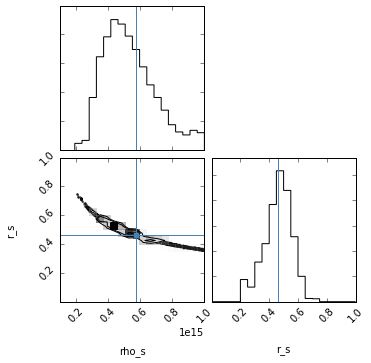

median(rho_s) =  541813225167954.56 +/- 404096605003430.8 160878997450686.12
median(log rho_s) =  14.733849601559767 +/- 0.24200013724642488 0.15299960490066766
Truth:  14.759302927824459
median(r_s) =  0.4704852760757562 +/- 0.08112719475150887 0.10027505100376399
Truth:  0.46071067596929743


In [122]:
M200_true,R200_true,conc_true,rho_s_true, sigma_rho_s_true,r_s_true, sigma_r_s_true =  nfws_errors(M200_orig[0], 0.2, z[0],cosmo_params, cosmo.name)
print rho_s_true, r_s_true, z
burn = 100
samples = sampler.chain[:, burn:, :].reshape((-1, 2))
print np.shape(sampler.chain)
fig = corner.corner(samples[:,:], labels=["rho_s", "r_s"], truths = [rho_s_true, r_s_true], range=[(1e14,1e15), (0.0,1.0)])
plt.show()
percentile_array = np.arange(33-16.5,67+16.5, 1.0)
rho_s_fit =  np.percentile(sampler.chain[:,burn:,0],percentile_array)
rho_s_fit_50 =  np.percentile(sampler.chain[:,burn:,0],50)
rho_s_fit_33 =  np.percentile(sampler.chain[:,burn:,0],33-16.5)
rho_s_fit_67 =  np.percentile(sampler.chain[:,burn:,0],67+16.5)
r_s_fit =  np.percentile(sampler.chain[:,burn:,1],percentile_array)
r_s_fit_50 =  np.percentile(sampler.chain[:,burn:,1],50)
r_s_fit_33 =  np.percentile(sampler.chain[:,burn:,1],33-16.5)
r_s_fit_67 =  np.percentile(sampler.chain[:,burn:,1],67+16.5)
print 'median(rho_s) = ', rho_s_fit_50, '+/-', rho_s_fit_67-rho_s_fit_50, rho_s_fit_50-rho_s_fit_33
print 'median(log rho_s) = ', np.log10(rho_s_fit_50), '+/-', np.log10(rho_s_fit_67)-np.log10(rho_s_fit_50), np.log10(rho_s_fit_50) -np.log10(rho_s_fit_33)
sigma_rho_s_fit = (rho_s_fit_67-rho_s_fit_50 + rho_s_fit_50-rho_s_fit_33)/2.0
print 'Truth: ', np.log10(rho_s_true)
print 'median(r_s) = ', r_s_fit_50, '+/-', r_s_fit_67-r_s_fit_50, r_s_fit_50-r_s_fit_33
sigma_rho_s_fit = (r_s_fit_67-r_s_fit_50 + r_s_fit_50-r_s_fit_33)/2.0
print 'Truth: ',r_s_true

In [60]:
burn = 100
len_r = 20
len_r_interp = 1000
rho_crit = cosmo.critical_density(z[0])
rho_crit = rho_crit.to(u.solMass / u.Mpc**3)
rho_s_fitted = sampler.chain[:,burn:,0].flatten()
r_s_fitted = sampler.chain[:,burn:,1].flatten()
rand_vec = np.random.uniform(1,len(r_s_fitted),size=10000).astype(int)
r_denfit = np.linspace(0.01,10.0,len_r).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
r_interp = np.linspace(0.01,10.0,len_r_interp).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.     
M200_fitted = []
R200_fitted = []
for i in range(len(rho_s_fitted)):
    rho_r = []
    for j in range(len_r):
        rho_r = np.append(rho_r,4*np.pi*integrate.quad(rhos_nfw_int,0,r_denfit[j],args=(rho_s_fitted[i],r_s_fitted[i]))[0]/(4/3.*np.pi*(r_denfit[j]**3.0)))
    log10_rho_r_func = interp1d(r, np.log10(rho_r), kind='quadratic')
    log10_rho_r_interp = log10_rho_r_func(r_interp)
    w = np.where(log10_rho_r_interp < np.log10(200*rho_crit.value))[0]
    R200_fitted = np.append(R200_fitted,r_interp[w[0]])
    M200_fitted = np.append(M200_fitted, 4*np.pi*integrate.quad(rhos_nfw_int,0,r_interp[w[0]],args=(rho_s_fitted[i],r_s_fitted[i]))[0])

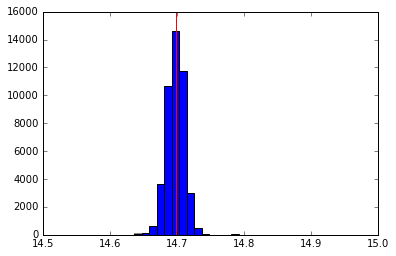

median(M200_fitted) =  498360687511099.1 +/- 14796910198514.75 12676748213069.375
median(logM200_fitted) =  14.697543776286789 +/- 0.012706987079518228 0.011190033920540188
Truth:  14.698970004336019 [0.05]


In [62]:
#We Choose to ignore bad fits in the posterior....in this case, those returning masses a factor of 10 below expectations. This happens due to degeneracies in 
#rho_s versus r_s, which are controlled when we usa an M - c relation. We note that previous results indicated a secondary peak in the posterior that produced
#BAD fits as evidenced through a posterior predictive check. Not an issue after we allow M200 to float in the likelihood.
w = np.where(M200_fitted > 1e13)[0]
plt.hist(np.log10(M200_fitted[w]),bins=20)
plt.axvline(np.log10(M200_true.value), color='r')
plt.xlim(14.5,15)
plt.show()
M200_fitted_50 =  np.percentile(M200_fitted[w],50)
M200_fitted_33 =  np.percentile(M200_fitted[w],33-16.5)
M200_fitted_67 =  np.percentile(M200_fitted[w],67+16.5)
print 'median(M200_fitted) = ', M200_fitted_50, '+/-', M200_fitted_67-M200_fitted_50, M200_fitted_50-M200_fitted_33
print 'median(logM200_fitted) = ', np.log10(M200_fitted_50), '+/-', np.log10(M200_fitted_67)-np.log10(M200_fitted_50), np.log10(M200_fitted_50) -np.log10(M200_fitted_33)
sigma_logM200_fitted = (np.log10(M200_fitted_67)-np.log10(M200_fitted_50) + np.log10(M200_fitted_50)-np.log10(M200_fitted_33))/2.0
print 'Truth: ', np.log10(M200_true.value), z

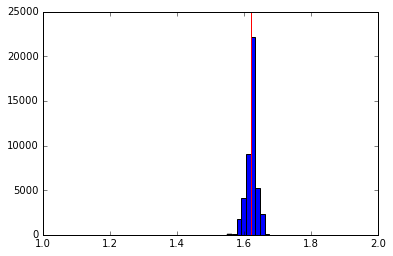

median(R200_fitted) =  1.62 +/- 0.019999999999999796 0.010000000000000231
Truth:  1.62038576164


In [65]:
w = np.where(M200_fitted > 2e13)[0]
plt.hist(R200_fitted[w],bins=20)
plt.axvline(R200_true.value, color='r')
plt.xlim(1,2)
plt.show()
R200_fitted_50 =  np.percentile(R200_fitted[w],50)
R200_fitted_33 =  np.percentile(R200_fitted[w],33-16.5)
R200_fitted_67 =  np.percentile(R200_fitted[w],67+16.5)
print 'median(R200_fitted) = ', R200_fitted_50, '+/-', R200_fitted_67-R200_fitted_50, R200_fitted_50-R200_fitted_33
print 'Truth: ', R200_true.value

In [67]:
for i in range(len(z)):
    plt.plot(r[i],ydata[i],'o', label = 'Data '+ str(i))
    plt.errorbar(r[i],ydata[i],yerr=ydata_err[i], linestyle='None')
r,truth = v_esc_NFW_M200(xdata,z,M200_use,N,cosmo_params, cosmo.name,num_clus)
for i in range(len(z)):
    plt.plot(r[i],truth[i],'-', label = 'Truth '+ str(i))
r,fitted = v_esc_NFW_M200(xdata,z,M200_fitted_50,N,cosmo_params, cosmo.name,num_clus)
for i in range(len(z)):
    plt.plot(r[i],fitted[i],'-', label = 'Fit '+ str(i))

#We Choose to ignore bad fits in the posterior....in this case, those returning masses a factor of 10 below expectations. This happens due to degeneracies in 
#rho_s versus r_s, which are controlled when we usa an M - c relation. We note the secondary peak in the posterior produce BAD fits as evidenced through
#a posterior predictive check.
w = np.where(M200_fitted < 5e13)[0]
plt.hist(np.log10(M200_fitted[w]),bins=100)
plt.xlim(13,14)
plt.show()

rho_s_bad_fitted_50 = np.percentile(rho_s_fitted[w],50)
r_s_bad_fitted_50 = np.percentile(r_s_fitted[w],50)
M200_bad_fitted_50 =  np.percentile(M200_fitted[w],50)
M200_bad_fitted_33 =  np.percentile(M200_fitted[w],33-16.5)
M200_bad_fitted_67 =  np.percentile(M200_fitted[w],67+16.5)
print 'median(M200_bad_fitted) = ', M200_bad_fitted_50, '+/-', M200_bad_fitted_67-M200_fit_50, M200_bad_fitted_50-M200_fit_33
print 'median(logM200_bad_fitted) = ', np.log10(M200_bad_fitted_50), '+/-', np.log10(M200_bad_fitted_67)-np.log10(M200_bad_fitted_50), np.log10(M200_bad_fitted_50) -np.log10(M200_bad_fitted_33)
sigma_logM200_bad_fitted = (np.log10(M200_bad_fitted_67)-np.log10(M200_bad_fitted_50) + np.log10(M200_bad_fitted_50)-np.log10(M200_bad_fitted_33))/2.0
print 'Truth: ', np.log10(M200.value), sigma_logM200_bad_fitted

r,truth = v_esc_NFW_M200(theta_data_array,z,M200_bad_fitted_50,100,cosmo_params, cosmo.name)
plt.plot(r, truth, '-', label = 'truth')
plt.errorbar(r,ydata,yerr=ydata_err, linestyle='None', label = 'data')
plt.ylim(0,2600)
plt.legend()

In [160]:
cosmo_name = 'FlatLambdaCDM'
cosmo = FlatLambdaCDM(H0=70, Om0=0.2,name = cosmo_name)
cosmo_params = cosmology(cosmo)
z = np.array((0.2))
z = np.repeat(z,(1))
num_clus = len(z)
M200_orig = np.repeat(1e15*u.solMass,len(z))
M200_use = np.repeat(1e15,len(z))
N = np.repeat(100,len(z))
radial_bins = 10
radius_array = np.linspace(0.1,2.5,radial_bins).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
xdata = np.zeros((len(z),radial_bins))
for i in range(len(z)):
    xdata[i] = radius_array /D_A(z[i], cosmo_params, cosmo.name).value

In [161]:
r,ydata = v_esc_NFW_M200(xdata,z,M200_use,N,cosmo_params, cosmo.name,num_clus)
error_kms = 50
ydata = ydata  + np.random.normal(0,error_kms,size=np.shape(ydata)) 
ydata_err = np.zeros(np.shape(ydata)) + error_kms

for i in range(len(z)):
    plt.plot(r[i],ydata[i],'o', label = 'Data '+ str(i))
    plt.errorbar(r[i],ydata[i],yerr=ydata_err[i], linestyle='None')
r,truth = v_esc_NFW_M200(xdata,z,M200_use,N,cosmo_params, cosmo.name,num_clus)
for i in range(len(z)):
    plt.plot(r[i],truth[i],'-', label = 'Truth '+ str(i))

In [162]:
def lnprior(theta):
    p_Omega_M = theta[0]
    p_little_h = theta[1]
    if not(0.05 < p_Omega_M < 0.5 and 0.5 < p_little_h < 1.0):
          return -np.inf
    return 0.0

In [163]:
def lnlike(theta, x, y, yerr): 
    p_theta_array = x
    p_z = z
    p_M200 = M200_use
    p_Omega_M = theta[0]
    p_little_h = theta[1]
    p_N = N
    p_num_clus = num_clus
    p_cosmo_name = cosmo_name
    p_cosmo_params = [p_Omega_M,p_little_h]
    ymodel_fixed = lambda p_theta_array,p_cosmo_params,p_cosmo_name:v_esc_NFW_M200(p_theta_array,p_z,p_M200,p_N,p_cosmo_params,p_cosmo_name,p_num_clus)
    r_cosmo, ymodel = ymodel_fixed(p_theta_array,p_cosmo_params,p_cosmo_name)
#    print model
    inv_sigma2 = 1.0/(yerr**2)
#    print -0.5*(np.sum((y-ymodel)**2*inv_sigma2))
    return np.nan_to_num(-0.5*(np.sum((y-ymodel)**2*inv_sigma2)))

In [164]:
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    ll = lnlike(theta, x, y, yerr)
    if not np.isfinite(lp):
        return -np.inf
    if not np.isfinite(ll):
        return -np.inf    
    return lp + lnlike(theta, x, y, yerr)

In [165]:
ndim, nwalkers, nsteps = 2, 100, 1000
start_pos = [cosmo.Om0, cosmo.h]
p0 = np.transpose([np.random.uniform(0.05,0.5,size=nwalkers), np.random.uniform(0.5,0.95,size=nwalkers)])

In [166]:
pool = Pool(processes=35)     
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(xdata, ydata, ydata_err),pool=pool)
sampler.run_mcmc(p0, nsteps)

State([[0.28249239 0.66070565]
 [0.17615842 0.69672031]
 [0.40451574 0.58245867]
 [0.35639269 0.63252671]
 [0.41722172 0.57564896]
 [0.400275   0.60285238]
 [0.14513177 0.72813386]
 [0.30593857 0.64054874]
 [0.23169936 0.66392931]
 [0.35934232 0.61131912]
 [0.0679051  0.75262547]
 [0.12604677 0.73715401]
 [0.13838166 0.73789625]
 [0.1111945  0.74616135]
 [0.38616248 0.61313139]
 [0.34772928 0.60898206]
 [0.25868846 0.68470072]
 [0.29306493 0.65406879]
 [0.39727682 0.60751409]
 [0.26466287 0.65790481]
 [0.27739751 0.66884195]
 [0.48081012 0.52525117]
 [0.1099503  0.71744396]
 [0.25438749 0.67447208]
 [0.37484301 0.60849289]
 [0.40137123 0.5933941 ]
 [0.14674608 0.72491851]
 [0.07697523 0.74577776]
 [0.36667772 0.62127576]
 [0.31971006 0.64272819]
 [0.26387572 0.66462349]
 [0.32925308 0.64644383]
 [0.19195926 0.679817  ]
 [0.31799513 0.63897142]
 [0.22981923 0.68755058]
 [0.07679829 0.75290971]
 [0.41041272 0.59088429]
 [0.13577695 0.71304993]
 [0.20930312 0.69564964]
 [0.42337871 0.5690

(100, 1000, 2)


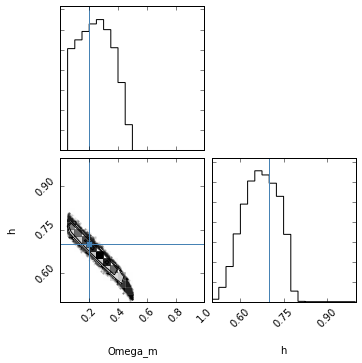

67
median(Omega_M) =  0.24782172798388286 +/- 0.11070043466014051 0.12622893353147707
median(h) =  0.6715871945901787 +/- 0.06225333352525275 0.0632267190767013
Truth:  0.2 0.7


In [167]:
burn = 100
samples = sampler.chain[:, burn:, :].reshape((-1, 2))
print np.shape(sampler.chain)
#truths = [rho_s, r_s, M200.value],
#fig = corner.corner(samples[:,:], labels=["Omega_m", "h","M200", "z"], range=[(0,1), (0.5,1.0), (1e14,2e15), (0.09,1.1)])
fig = corner.corner(samples[:,:], labels=["Omega_m", "h"], truths = [cosmo.Om0, cosmo.h], range=[(0,1), (0.5,1.0)])
plt.show()
percentile_array = np.arange(33-16.5,67+16.5, 1.0)
print len(percentile_array)
Omega_M_fit =  np.percentile(sampler.chain[:,:,0],percentile_array)
h_fit =  np.percentile(sampler.chain[:,:,1],percentile_array)
Omega_M_fit_50 =  np.percentile(sampler.chain[:,:,0],50)
h_fit_50 = np.percentile(sampler.chain[:,:,1],50)
Omega_M_fit_33 =  np.percentile(sampler.chain[:,:,0],33-16.5)
h_fit_33 = np.percentile(sampler.chain[:,:,1],33-16.5)
Omega_M_fit_67 =  np.percentile(sampler.chain[:,:,0],67+13.5)
h_fit_67 = np.percentile(sampler.chain[:,:,1],67+16.5)
print 'median(Omega_M) = ', Omega_M_fit_50, '+/-', Omega_M_fit_67-Omega_M_fit_50, Omega_M_fit_50-Omega_M_fit_33
print 'median(h) = ', h_fit_50, '+/-', h_fit_67-h_fit_50, h_fit_50-h_fit_33
print 'Truth: ', cosmo.Om0, cosmo.h

In [168]:
burn = 200
print np.shape(sampler.chain)
Omega_m_fitted = sampler.chain[:,burn:,0].flatten()
h_fitted = sampler.chain[:,burn:,1].flatten()
rand_vec = np.random.uniform(1,len(Omega_m_fitted),size=5000).astype(int)
r = np.linspace(0.01,2.0,1000).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
Om0h_fitted = []
for i in range(5000):
    Om0h_fitted = np.append(Om0h_fitted, Omega_m_fitted[rand_vec[i]]*h_fitted[rand_vec[i]]/1.8)
print Om0h_fitted

(100, 1000, 2)
[0.13757859 0.02768603 0.05053207 ... 0.06365793 0.1085854  0.02160381]


In [169]:
print cosmo.Om0*(cosmo.h**1.0)
plt.hist(Om0h_fitted,bins=100)
plt.axvline(0.14,color='r')
plt.xlim(0.0,0.5)

0.14


(0.0, 0.5)

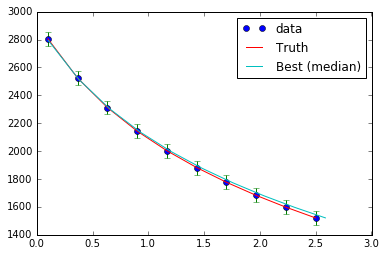

In [171]:
r,ydata = v_esc_NFW_M200(xdata,z,M200_use,N,cosmo_params, cosmo.name,num_clus)
plt.plot(r[0],ydata[0], 'o', linestyle='None',label = 'data')
plt.errorbar(r[0],ydata[0],yerr=ydata_err[0], linestyle='None')
r,truth = v_esc_NFW_M200(xdata,z,M200_use,N,cosmo_params, cosmo.name,num_clus)
plt.plot(r[0], truth[0], '-', label = 'Truth')
r,truth = v_esc_NFW_M200(xdata,z,M200_use,N,[Omega_M_fit_50,h_fit_50,], cosmo.name,num_clus)
plt.plot(r[0], truth[0], '-', label = 'Best (median)')
plt.legend()

In [3]:
cosmo_name = 'FlatLambdaCDM'
cosmo = FlatLambdaCDM(H0=70, Om0=0.2,name = cosmo_name)
cosmo_params = cosmology(cosmo)
z = np.array((0.2))
z = np.repeat(z,(1))
num_clus = len(z)
M200_orig = np.repeat(1e15*u.solMass,len(z))
M200_use = np.repeat(1e15,len(z))
N = np.repeat(100,len(z))
radial_bins = 10
radius_array = np.linspace(0.1,2.5,radial_bins).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
xdata = np.zeros((len(z),radial_bins))
for i in range(len(z)):
    xdata[i] = radius_array /D_A(z[i], cosmo_params, cosmo.name).value

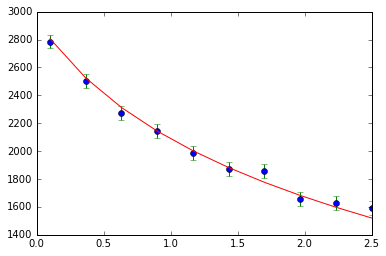

In [4]:
r,ydata = v_esc_NFW_M200(xdata,z,M200_use,N,cosmo_params, cosmo.name,num_clus)
error_kms = 50
ydata = ydata  + np.random.normal(0,error_kms,size=np.shape(ydata)) 
ydata_err = np.zeros(np.shape(ydata)) + error_kms

for i in range(len(z)):
    plt.plot(r[i],ydata[i],'o', label = 'Data '+ str(i))
    plt.errorbar(r[i],ydata[i],yerr=ydata_err[i], linestyle='None')
r,truth = v_esc_NFW_M200(xdata,z,M200_use,N,cosmo_params, cosmo.name,num_clus)
for i in range(len(z)):
    plt.plot(r[i],truth[i],'-', label = 'Truth '+ str(i))

In [5]:
def lnprior(theta):
    p_qH2 = theta[0]
    if not(-10000 < p_qH2 < 0):
          return -np.inf
    return 0.0

In [6]:
def lnlike(theta, x, y, yerr): 
    p_theta_array = x
    p_z = z
    p_M200 = M200_use
    p_qH2 = theta[0]
    p_cosmo_params = cosmo_params
    p_cosmo_name = cosmo_name
    p_N = N
    p_num_clus = num_clus
    ymodel_fixed = lambda p_theta_array,p_qH2:v_esc_NFW_M200_qH2(p_theta_array,p_z,p_M200,p_N,p_qH2,p_cosmo_params,p_cosmo_name,p_num_clus)
    r_cosmo, ymodel = ymodel_fixed(p_theta_array,p_qH2)
#    print model
    inv_sigma2 = 1.0/(yerr**2)
#    print -0.5*(np.sum((y-ymodel)**2*inv_sigma2))
    return np.nan_to_num(-0.5*(np.sum((y-ymodel)**2*inv_sigma2)))

In [7]:
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    ll = lnlike(theta, x, y, yerr)
    if not np.isfinite(lp):
        return -np.inf
    if not np.isfinite(ll):
        return -np.inf    
    return lp + lnlike(theta, x, y, yerr)

In [8]:
ndim, nwalkers, nsteps = 1, 1000, 500
p0 = np.transpose([np.random.uniform(-10000,0,size=nwalkers)])

In [9]:
pool = Pool(processes=35)     
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(xdata, ydata, ydata_err),pool=pool)
sampler.run_mcmc(p0, nsteps)

State([[-3081.60418737]
 [-3657.32360913]
 [-3156.51270091]
 [-3043.51613763]
 [-3357.27275911]
 [-3221.73360224]
 [-2831.70059012]
 [-3150.92908676]
 [-2410.01464493]
 [-2777.73840928]
 [-2990.20023964]
 [-2505.01368412]
 [-4461.65776481]
 [-2437.38309311]
 [-2825.79860113]
 [-3038.22855703]
 [-3045.58425041]
 [-3268.39497371]
 [-2945.49623235]
 [-2961.10647698]
 [-3088.34383261]
 [-3813.12316106]
 [-3935.99791738]
 [-2804.58792165]
 [-2836.78099773]
 [-2450.16732009]
 [-2903.01606738]
 [-3111.1919424 ]
 [-3394.40032592]
 [-3660.03730103]
 [-2354.33527859]
 [-2781.21177456]
 [-3387.79166478]
 [-2776.28658453]
 [-2888.87328637]
 [-3605.58743785]
 [-2758.37749307]
 [-2248.15279371]
 [-3423.18285046]
 [-3017.88018953]
 [-2996.63463309]
 [-2872.64243031]
 [-3076.53913797]
 [-3206.39687556]
 [-3313.34439992]
 [-2501.65687079]
 [-2631.86933782]
 [-2461.14673104]
 [-3748.98770387]
 [-2931.78905997]
 [-2088.23394725]
 [-2790.98173666]
 [-2827.77228799]
 [-2996.87930978]
 [-3283.05389187]
 [-2

In [10]:
burn = 100
H_z = H_z_function(z,cosmo_params,cosmo.name).value
q_z= q_z_function(z,cosmo_params,cosmo.name)
print H_z**2.0*q_z
samples = sampler.chain[:, burn:,0:].reshape((-1, 1))
print np.shape(sampler.chain), np.shape(samples)
fig = corner.corner(samples, labels=["qH2"], truths= [(H_z**2.0*q_z)])
plt.show()
percentile_array = np.arange(33-16.5,67+16.5, 1.0)
print len(percentile_array)
qH2_fit =  np.percentile(sampler.chain[:,burn:,0],percentile_array)
qH2_fit_50 =  np.percentile(sampler.chain[:,burn:,0],50)
qH2_fit_33 =  np.percentile(sampler.chain[:,burn:,0],33-16.5)
qH2_fit_67 =  np.percentile(sampler.chain[:,burn:,0],67+16.5)
print 'median(qH2) = ', qH2_fit_50, '+/-', qH2_fit_67-qH2_fit_50, qH2_fit_50-qH2_fit_33
sigma_qH2_fit = (qH2_fit_67-qH2_fit_50 + qH2_fit_50-qH2_fit_33)/2.0
H_z = H_z_function(z,cosmo_params,cosmo.name).value
q_z= q_z_function(z,cosmo_params,cosmo.name)
print 'truth = ', H_z**2.0*q_z

[-3073.28]
(1000, 500, 1) (400000, 1)


67
median(qH2) =  -2886.917894859552 +/- 362.90599359396765 402.00372200543643
truth =  [-3073.28]


median(qH2) =  -3069.45861178048 +/- 882.6157628030587 1199.7382618174252 Om=0.2
median(qH2) =  -2740.3968208140213 +/- 794.0167158673407 1123.8039894959147 Om = 0.1
median(qH2) =  -3392.601505853366 +/- 949.7394756548924 1276.6696775446298 Om = 0.3

In [13]:
print r
r,ydata = v_esc_NFW_M200_qH2(xdata,z,M200_use,N,H_z**2.0*q_z,cosmo_params, cosmo.name,num_clus)
plt.plot(r[0],ydata[0], 'o', linestyle='None',label = 'data')
plt.errorbar(r[0],ydata[0],yerr=ydata_err[0], linestyle='None')
r,truth = v_esc_NFW_M200_qH2(xdata,z,M200_use,N,H_z**2.0*q_z,cosmo_params, cosmo.name,num_clus)
plt.plot(r[0], truth[0], '-', label = 'Truth')
r,truth = v_esc_NFW_M200_qH2(xdata,z,M200_use,N,qH2_fit_50, cosmo_params,cosmo.name,num_clus)
plt.plot(r[0], truth[0], '-', label = 'Best (median)')
plt.legend()

[array([0.1  , 0.367, 0.633, 0.9  , 1.167, 1.433, 1.7  , 1.967, 2.233,
       2.5  ])]


In [24]:
burn = 100
qH2_fitted = sampler.chain[:,burn:,0].flatten()
rand_vec = np.random.uniform(1,len(qH2_fitted),size=1000).astype(int)
for i in range(1000):
    r,fitted = v_esc_NFW_M200_qH2(xdata,z,M200_use,N,qH2_fitted[rand_vec[i]],[cosmo.Om0,cosmo.h],cosmo.name, num_clus)
    plt.plot(r[0], fitted[0],'grey',lw=0.1)
plt.plot(r[0],ydata[0], 'o', linestyle='None',label = 'data')
plt.errorbar(r[0],ydata[0],yerr=ydata_err[0], linestyle='None')
r,truth = v_esc_NFW_M200_qH2(xdata,z,M200_use,N,H_z**2.0*q_z,[cosmo.Om0,cosmo.h], cosmo.name, num_clus)
plt.plot(r[0], truth[0], '-', label = 'Truth')
plt.show()

In [25]:
print qH2_fit_50/(70.0**2.0),qH2_fit_33/(70.0**2.0), qH2_fit_67/(70.0**2.0), H_z**2.0*q_z/(H_z**2.0)

-0.5891669173182759 -0.6712084932377527 -0.5151044696460376 [-0.54748603]


In [26]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.2,name = 'FlatLambdaCDM')
cosmo_params = cosmology(cosmo)
z = np.array((0.05))
z = np.repeat(z,(1))
num_clus = len(z)
M200_orig = np.repeat(5e14*u.solMass,len(z))
M200_use = np.repeat(5e14,len(z))
N = np.repeat(100,len(z))
radial_bins = 10
radius_array = np.linspace(0.1,2.0,radial_bins).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
xdata = np.zeros((len(z),radial_bins))
for i in range(len(z)):
    xdata[i] = radius_array /D_A(z[i], cosmo_params, cosmo.name).value

In [27]:
r,ydata = v_esc_NFW_M200(xdata,z,M200_use,N,cosmo_params, cosmo.name,num_clus)
error_kms = 50
ydata = ydata  + np.random.normal(0,error_kms,size=np.shape(ydata)) 
ydata_err = np.zeros(np.shape(ydata)) + error_kms
for i in range(len(z)):
    plt.plot(r[i],ydata[i],'o', label = 'Data '+ str(i))
    plt.errorbar(r[i],ydata[i],yerr=ydata_err[i], linestyle='None')
r,truth = v_esc_NFW_M200(xdata,z,M200_use,N,cosmo_params, cosmo.name,num_clus)
for i in range(len(z)):
    plt.plot(r[i],truth[i],'-', label = 'Truth '+ str(i))

In [59]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.2,name = 'FlatLambdaCDM')
cosmo_params = cosmology(cosmo)
z = np.arange(0.05,0.35,0.01)
num_clus = len(z)
print num_clus
M200_orig = np.repeat(1e15*u.solMass,len(z))
M200_use = np.repeat(1e15,len(z))
N = np.repeat(150,len(z))
radial_bins = 10
radius_array = np.linspace(0.1,2.0,radial_bins).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
xdata = np.zeros((len(z),radial_bins))
for i in range(len(z)):
    xdata[i] = radius_array /D_A(z[i], cosmo_params, cosmo.name).value

30


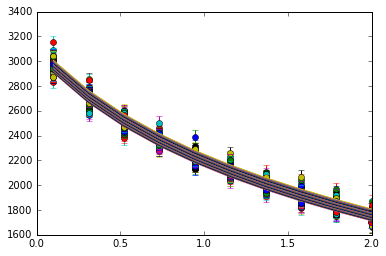

In [60]:
r,ydata = v_esc_NFW_M200(xdata,z,M200_use,N,cosmo_params, cosmo.name,num_clus)
error_kms = 50
ydata = ydata  + np.random.normal(0,error_kms,size=np.shape(ydata)) 
ydata_err = np.zeros(np.shape(ydata)) + error_kms

for i in range(len(z)):
    plt.plot(r[i],ydata[i],'o', label = 'Data '+ str(i))
    plt.errorbar(r[i],ydata[i],yerr=ydata_err[i], linestyle='None')
r,truth = v_esc_NFW_M200(xdata,z,M200_use,N,cosmo_params, cosmo.name,num_clus)
for i in range(len(z)):
    plt.plot(r[i],truth[i],'-', label = 'Truth '+ str(i))

In [61]:
def lnprior(theta):
    p_Omega_M = theta[0]
    p_little_h = theta[1]
    if not(0.05 < p_Omega_M < 0.5 and 0.5 < p_little_h < 1.0):
          return -np.inf
    return 0.0

In [62]:
def lnlike(theta, x, y, yerr): 
    p_theta_array = x
    p_z = z
    p_M200 = M200_use
    p_Omega_M = theta[0]
    p_little_h = theta[1]
    p_N = N
    p_num_clus = num_clus
    p_cosmo_name = cosmo_name
    p_cosmo_params = [p_Omega_M,p_little_h]
    ymodel_fixed = lambda p_theta_array,p_cosmo_params,p_cosmo_name:v_esc_NFW_M200(p_theta_array,p_z,p_M200,p_N,p_cosmo_params,p_cosmo_name,p_num_clus)
    r_cosmo, ymodel = ymodel_fixed(p_theta_array,p_cosmo_params,p_cosmo_name)
#    print model
    inv_sigma2 = 1.0/(yerr**2)
#    print -0.5*(np.sum((y-ymodel)**2*inv_sigma2))
    return np.nan_to_num(-0.5*(np.sum((y-ymodel)**2*inv_sigma2)))

In [63]:
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    ll = lnlike(theta, x, y, yerr)
    if not np.isfinite(lp):
        return -np.inf
    if not np.isfinite(ll):
        return -np.inf    
    return lp + lnlike(theta, x, y, yerr)

In [64]:
ndim, nwalkers, nsteps = 2, 100, 1000
start_pos = [cosmo.Om0, cosmo.h]
p0 = np.transpose([np.random.uniform(0.05,0.5,size=nwalkers), np.random.uniform(0.5,0.95,size=nwalkers)])

In [65]:
pool = Pool(processes=35)     
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(xdata, ydata, ydata_err),pool=pool)
sampler.run_mcmc(p0, nsteps)

State([[0.21724219 0.691636  ]
 [0.20568827 0.69869552]
 [0.22930583 0.68782167]
 [0.24336956 0.68099106]
 [0.2208748  0.69242167]
 [0.22858047 0.68949388]
 [0.24460418 0.67930236]
 [0.21334143 0.69203828]
 [0.22596857 0.68693451]
 [0.16994455 0.71250928]
 [0.22745528 0.6900632 ]
 [0.22662782 0.69022139]
 [0.18807272 0.70579197]
 [0.24884841 0.67519572]
 [0.20672132 0.70111335]
 [0.21241914 0.69447204]
 [0.23494375 0.6861499 ]
 [0.20100019 0.70093176]
 [0.22839402 0.68432352]
 [0.19279184 0.70544628]
 [0.19472605 0.70554581]
 [0.23267508 0.68829796]
 [0.23790987 0.68167581]
 [0.19259977 0.70331565]
 [0.21993335 0.69139248]
 [0.21705228 0.69593963]
 [0.21904356 0.69339997]
 [0.24366515 0.68116933]
 [0.24843755 0.67970403]
 [0.21153662 0.69864445]
 [0.22482642 0.6928175 ]
 [0.20643356 0.69805414]
 [0.21530948 0.69899342]
 [0.20435188 0.69813389]
 [0.18987591 0.70448738]
 [0.22664092 0.68833727]
 [0.19817831 0.70077487]
 [0.20738969 0.6941419 ]
 [0.22801657 0.68852812]
 [0.23555772 0.6838

(100, 1000, 2)


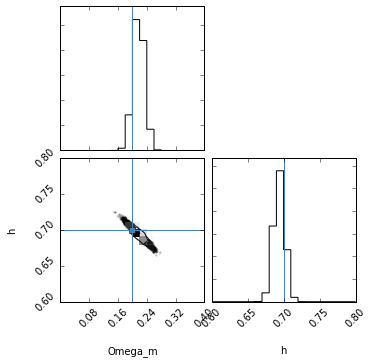

67
median(Omega_M) =  0.21746518705884668 +/- 0.013590641406457576 0.014819494484690166
median(h) =  0.6938228355105844 +/- 0.007340051381206525 0.007524068114170057
Truth:  0.2 0.7


In [66]:
burn = 400
samples = sampler.chain[:, burn:, :].reshape((-1, 2))
print np.shape(sampler.chain)
#truths = [rho_s, r_s, M200.value],
#fig = corner.corner(samples[:,:], labels=["Omega_m", "h","M200", "z"], range=[(0,1), (0.5,1.0), (1e14,2e15), (0.09,1.1)])
fig = corner.corner(samples[:,:], labels=["Omega_m", "h"], truths = [cosmo.Om0, cosmo.h], range=[(0,0.4), (0.6,0.8)])
plt.show()
percentile_array = np.arange(33-16.5,67+16.5, 1.0)
print len(percentile_array)
Omega_M_fit =  np.percentile(sampler.chain[:,burn:,0],percentile_array)
h_fit =  np.percentile(sampler.chain[:,burn:,1],percentile_array)
Omega_M_fit_50 =  np.percentile(sampler.chain[:,burn:,0],50)
h_fit_50 = np.percentile(sampler.chain[:,burn:,1],50)
Omega_M_fit_33 =  np.percentile(sampler.chain[:,burn:,0],33-16.5)
h_fit_33 = np.percentile(sampler.chain[:,burn:,1],33-16.5)
Omega_M_fit_67 =  np.percentile(sampler.chain[:,burn:,0],67+13.5)
h_fit_67 = np.percentile(sampler.chain[:,burn:,1],67+16.5)
print 'median(Omega_M) = ', Omega_M_fit_50, '+/-', Omega_M_fit_67-Omega_M_fit_50, Omega_M_fit_50-Omega_M_fit_33
print 'median(h) = ', h_fit_50, '+/-', h_fit_67-h_fit_50, h_fit_50-h_fit_33
print 'Truth: ', cosmo.Om0, cosmo.h

In [ ]:
median(Omega_M) =  0.16020498366050426 +/- 0.01405155129423255 0.01522627838347948
median(h) =  0.720601160633259 +/- 0.007356247709764618 0.007696122687491647
Truth:  0.2 0.7

Mean fit (1e15) =  0.9982395285114913
M200 =  1e+15 solMass
R200 (sphere) =  1.97141172229 Mpc
Conc (Sereno) =  3.2041969809
n =  3.9924040270729604
sigma n =  0.035425850063980135
rho_0 =  3.513234669356727e+17
sigma_rho_0 =  5009458177993920.0
h =  0.00015851541579169618
sigma_h =  3.1703083158339235e-05


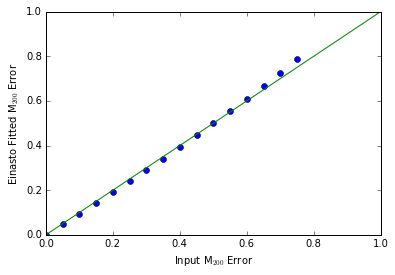

In [7]:
M200 = 1e15*u.solMass
cosmo = wCDM(H0=70, Om0=0.2,Ode0 = 0.8,w0=-1,name = 'wCDM')
cosmo_params = cosmology(cosmo)
radius_array = np.linspace(0.3,2.0,100).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
z = 0.2
theta_array = radius_array /D_A(z,cosmo_params, cosmo.name)
real_error = []
real_mean = []
corr_coef = 0.2
for i in range(16):
    M200,R200,conc, rho_0, h,n, sigma_rho_0, sigma_h,sigma_n =  einasto_nfwM200_errors(M200, np.float(i)/20.0, z,cosmo_params, cosmo.name)
    M200_einasto = 4*np.pi*integrate.quad(rho_einasto_int,0,R200.value,args=(rho_0,h,n))[0]
    M200_einasto_p = 4*np.pi*integrate.quad(rho_einasto_int,0,R200.value,args=(rho_0+sigma_rho_0, h+corr_coef*sigma_h, n+sigma_n ))[0]
    M200_einasto_m = 4*np.pi*integrate.quad(rho_einasto_int,0,R200.value,args=(rho_0-sigma_rho_0, h-corr_coef*sigma_h, n-sigma_n ))[0]
    real_error =  np.append(real_error,((1-M200_einasto_m) + (M200_einasto_p-1))/(2*M200_einasto))
    real_mean =  np.append(real_mean,M200_einasto)
plt.plot(np.arange(0,0.8,0.05),real_error,'o')
plt.plot([0,1],[0,1])
plt.xlabel('Input M$_{200}$ Error')
plt.ylabel('Einasto Fitted M$_{200}$ Error')
#Note the 0.7, which is given in Alejo's paper's appendix. We need it!
print 'Mean fit (1e15) = ', np.sum(real_mean)/16/1e15

M200,R200,conc,rho_0, h,n, sigma_rho_0, sigma_h,sigma_n =  einasto_nfwM200_errors(M200, 0.2, z,cosmo_params, cosmo.name)
print 'M200 = ', M200
print 'R200 (sphere) = ', R200
print 'Conc (Sereno) = ', conc
print 'n = ',n
print 'sigma n = ', sigma_n
print 'rho_0 = ',rho_0
print 'sigma_rho_0 = ', sigma_rho_0
print 'h = ', h
print 'sigma_h = ', corr_coef*h

Mean fit (1e15) =  0.5000000000000002
M200 =  5.0 solMass
R200 (sphere) =  1.56471052091 Mpc
Conc (Sereno) =  3.39629750846
rho_s/1e14 =  5.745170579479509
sigma rho_s/1e14 =  0.24892813462110125
r_s =  0.46071067596929743
sigma r_s =  0.03829814702511186


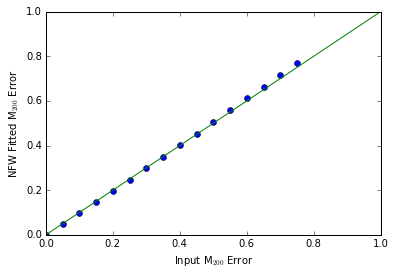

In [8]:
M200 = 5e14*u.solMass
cosmo = wCDM(H0=70, Om0=0.2,Ode0 = 0.8,w0=-1,name = 'wCDM')
cosmo_params = cosmology(cosmo)
radius_array = np.linspace(0.3,2.0,100).round(3)* u.Mpc #specify radius array for profiles. used in v_esc(r) funcs below.
z = 0.2
theta_array = radius_array /D_A(z,cosmo_params, cosmo.name)
real_error = []
real_mean = []
corr_coef = 0.85
for i in range(16):
    M200,R200,conc,rho_s, sigma_rho_s,r_s, sigma_r_s =  nfws_errors(M200, np.float(i)/20.0, z,cosmo_params, cosmo.name)
    M200_nfws = 4*np.pi*integrate.quad(rhos_nfw_int,0,R200.value,args=(rho_s, r_s))[0]
    M200_nfws_p = 4*np.pi*integrate.quad(rhos_nfw_int,0,R200.value,args=(rho_s+sigma_rho_s,r_s+corr_coef*sigma_r_s))[0]
    M200_nfws_m = 4*np.pi*integrate.quad(rhos_nfw_int,0,R200.value,args=(rho_s-sigma_rho_s,r_s-corr_coef*sigma_r_s))[0]
    real_error =  np.append(real_error,((1-M200_nfws_m) + (M200_nfws_p-1))/(2*M200_nfws))
    real_mean =  np.append(real_mean,M200_nfws)
plt.plot(np.arange(0,0.8,0.05),real_error,'o')
plt.plot([0,1],[0,1])
plt.xlabel('Input M$_{200}$ Error')
plt.ylabel('NFW Fitted M$_{200}$ Error')
#Note the 0.7, which is given in Alejo's paper's appendix. We need it!
print 'Mean fit (1e15) = ', np.sum(real_mean)/16/1e15
M200,R200,conc,rho_s, sigma_rho_s,r_s, sigma_r_s =  nfws_errors(M200, 0.2, z,cosmo_params, cosmo.name)

print 'M200 = ', M200/1e14
print 'R200 (sphere) = ', R200
print 'Conc (Sereno) = ', conc
print 'rho_s/1e14 = ' , rho_s/1e14
print 'sigma rho_s/1e14 = ' , sigma_rho_s/1e14
print 'r_s = ',r_s
print 'sigma r_s = ', sigma_r_s